In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples=200,n_features=20,n_classes=2,weights=[1,1],random_state=1)

(array([ 99.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 101.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

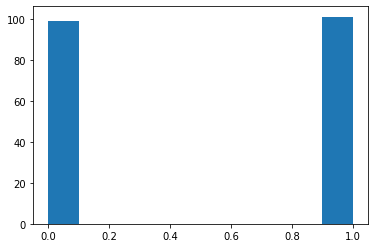

In [4]:
plt.hist(y)

In [5]:
X.shape

(200, 20)

In [6]:
y.shape

(200,)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [11]:
from sklearn.metrics import roc_curve,roc_auc_score

##  Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_train_predict = rf.predict_proba(X_train)
print(roc_auc_score(y_train,y_train_predict[:,1]))
y_test_predict = rf.predict_proba(X_test)
print(roc_auc_score(y_test,y_test_predict[:,1]))

1.0
0.9326923076923077


In [14]:
t = rf.predict(X_train)

In [15]:
a = zip(y_train_predict,t)

In [17]:
for i in a:
    print(i)

(array([0.08, 0.92]), 1)
(array([0.05, 0.95]), 1)
(array([0., 1.]), 1)
(array([0.07, 0.93]), 1)
(array([0., 1.]), 1)
(array([0.15, 0.85]), 1)
(array([1., 0.]), 0)
(array([0.97, 0.03]), 0)
(array([0.92, 0.08]), 0)
(array([0.95, 0.05]), 0)
(array([0., 1.]), 1)
(array([0.05, 0.95]), 1)
(array([0.95, 0.05]), 0)
(array([0.02, 0.98]), 1)
(array([0.17, 0.83]), 1)
(array([0.99, 0.01]), 0)
(array([0.9, 0.1]), 0)
(array([0.08, 0.92]), 1)
(array([0.02, 0.98]), 1)
(array([0.08, 0.92]), 1)
(array([0.09, 0.91]), 1)
(array([0.1, 0.9]), 1)
(array([0.98, 0.02]), 0)
(array([0.96, 0.04]), 0)
(array([0.98, 0.02]), 0)
(array([0.07, 0.93]), 1)
(array([0.96, 0.04]), 0)
(array([0.02, 0.98]), 1)
(array([0.9, 0.1]), 0)
(array([0.02, 0.98]), 1)
(array([0.04, 0.96]), 1)
(array([0.03, 0.97]), 1)
(array([0.96, 0.04]), 0)
(array([0.05, 0.95]), 1)
(array([0.97, 0.03]), 0)
(array([0.02, 0.98]), 1)
(array([0.93, 0.07]), 0)
(array([0.01, 0.99]), 1)
(array([0.9, 0.1]), 0)
(array([0.1, 0.9]), 1)
(array([0.02, 0.98]), 1)
(

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_train_predict = lg.predict_proba(X_train)
print(roc_auc_score(y_train,y_train_predict[:,1]))
y_test_predict = lg.predict_proba(X_test)
print(roc_auc_score(y_test,y_test_predict[:,1]))

0.9844102564102564
0.9581447963800904


## Adaboost Classifier

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
ad = AdaBoostClassifier()
ad.fit(X_train,y_train)
y_train_predict = ad.predict_proba(X_train)
print(roc_auc_score(y_train,y_train_predict[:,1]))
y_test_predict = ad.predict_proba(X_test)
print(roc_auc_score(y_test,y_test_predict[:,1]))

1.0
0.9751131221719458


## KNN Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
y_train_predict = kn.predict_proba(X_train)
print(roc_auc_score(y_train,y_train_predict[:,1]))
y_test_predict = kn.predict_proba(X_test)
print(roc_auc_score(y_test,y_test_predict[:,1]))

0.9751794871794872
0.8574660633484162


In [24]:
pred = []
for model in [rf,lg,ad,kn]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))

In [25]:
p = pd.DataFrame(pred,index=['RandomForest','LogisticRegression','Adaboost','KNN'])

In [26]:
p

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
RandomForest,0.080000,0.320000,0.080000,0.150000,0.880000,0.930000,0.890000,0.060000,0.050000,0.670000,...,0.730000,0.700000,0.140000,0.800000,0.400000,0.130000,0.780000,0.680000,0.080000,0.650000
LogisticRegression,0.070233,0.000053,0.014947,0.000045,0.967079,0.943132,0.963135,0.012338,0.001578,0.968635,...,0.864179,0.810013,0.519961,0.943657,0.475844,0.021645,0.904723,0.931817,0.006195,0.879520
Adaboost,0.338226,0.527157,0.378824,0.355288,0.778440,0.720646,0.746343,0.353102,0.301780,0.639402,...,0.595887,0.418583,0.439721,0.562088,0.418663,0.360189,0.622196,0.638681,0.335020,0.622096
KNN,0.400000,0.200000,0.000000,0.000000,0.400000,1.000000,1.000000,0.200000,0.400000,0.800000,...,0.800000,0.600000,0.400000,0.400000,0.600000,0.200000,0.800000,0.600000,0.200000,0.400000


In [27]:
p = p.T

In [28]:
p

,RandomForest,LogisticRegression,Adaboost,KNN
0,0.08,0.070233,0.338226,0.4
1,0.32,0.000053,0.527157,0.2
2,0.08,0.014947,0.378824,0.0
3,0.15,0.000045,0.355288,0.0
4,0.88,0.967079,0.778440,0.4
5,0.93,0.943132,0.720646,1.0
6,0.89,0.963135,0.746343,1.0
7,0.06,0.012338,0.353102,0.2
8,0.05,0.001578,0.301780,0.4
9,0.67,0.968635,0.639402,0.8


In [29]:
final_prediction=pd.concat(pred,axis=1).mean(axis=1)

In [30]:
final_prediction

0     0.222115
1     0.261802
2     0.118443
3     0.126333
4     0.756380
5     0.898445
6     0.899870
7     0.156360
8     0.188340
9     0.769509
10    0.400031
11    0.244097
12    0.692091
13    0.837135
14    0.122719
15    0.131183
16    0.668967
17    0.943044
18    0.482363
19    0.913898
20    0.376553
21    0.196288
22    0.821300
23    0.945030
24    0.156791
25    0.788852
26    0.544748
27    0.111983
28    0.779513
29    0.241503
30    0.718542
31    0.683476
32    0.743882
33    0.515527
34    0.694200
35    0.794412
36    0.156575
37    0.345295
38    0.581694
39    0.749415
40    0.168915
41    0.166140
42    0.109426
43    0.143814
44    0.162099
45    0.880891
46    0.170557
47    0.321460
48    0.801793
49    0.243727
50    0.747516
51    0.632149
52    0.374920
53    0.676436
54    0.473627
55    0.177958
56    0.776730
57    0.712624
58    0.155304
59    0.637904
dtype: float64

In [31]:
print(roc_auc_score(y_test,final_prediction))

0.9558823529411764


In [32]:
## Calculating the Roc curve

In [34]:
fpr,tpr,threshold = roc_curve(y_test,final_prediction)

In [50]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()

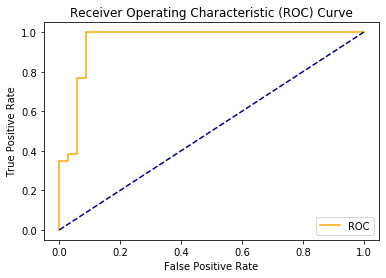

In [51]:
plot_roc_curve(fpr, tpr)

#### Threshold

In [52]:
threshold

array([1.94502961, 0.94502961, 0.80179306, 0.79441234, 0.78885238,
       0.77951257, 0.69209142, 0.68347562, 0.54474829, 0.10942583])

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accu_ls = []
for thres in threshold:
    y_pred = np.where(final_prediction>thres,1,0)
    accu_ls.append(accuracy_score(y_test,y_pred))

In [56]:
pd.Series(accu_ls)

0    0.566667
1    0.566667
2    0.700000
3    0.716667
4    0.700000
5    0.716667
6    0.850000
7    0.866667
8    0.933333
9    0.450000
dtype: float64

In [57]:
pd.Series(threshold)

0    1.945030
1    0.945030
2    0.801793
3    0.794412
4    0.788852
5    0.779513
6    0.692091
7    0.683476
8    0.544748
9    0.109426
dtype: float64

In [62]:
d = pd.concat([pd.Series(accu_ls),pd.Series(threshold)],axis=1)

In [67]:
d.columns=['accuracy','threshold']

In [72]:
d.sort_values(by= 'accuracy',ascending=False)

,accuracy,threshold
8,0.933333,0.544748
7,0.866667,0.683476
6,0.850000,0.692091
3,0.716667,0.794412
5,0.716667,0.779513
2,0.700000,0.801793
4,0.700000,0.788852
0,0.566667,1.945030
1,0.566667,0.945030
9,0.450000,0.109426


Therefore we consider threshold to be 0.544 to get the maximum accuracy score.